In [1]:
from utils import *
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dropout,Flatten,Dense
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

# Checking system compatibility

In [2]:
print(f'Tensorflow version -> {tf.__version__}')
print(f"GPU Available -> {tf.config.list_physical_devices('GPU')}")
print(f'Checking if tensorflow supports GPU -> {tf.test.is_built_with_gpu_support()}')

Tensorflow version -> 2.7.0
GPU Available -> [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Checking if tensorflow supports GPU -> True


# Creating Data

In [3]:
if not isMoved():
    moveFiles()

In [4]:
trainGenerator = ImageDataGenerator(
    rescale=1/255.0,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

testGenerator = ImageDataGenerator(rescale=1/255.0)

In [5]:
trainSet = trainGenerator.flow_from_directory(
    directory='Dataset/Train',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

validationSet = trainGenerator.flow_from_directory(
    directory='Dataset/Val',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

testSet = testGenerator.flow_from_directory(
    directory='Dataset/Test',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64
)

Found 2224 images belonging to 2 classes.
Found 248 images belonging to 2 classes.
Found 619 images belonging to 2 classes.


In [6]:
labelDict = dict(zip(trainSet.class_indices.values(), trainSet.class_indices.keys()))

# Analyzing the data

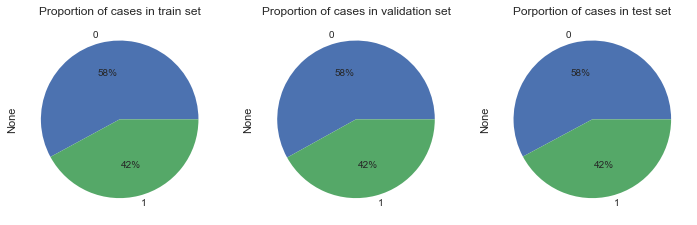

In [7]:
plotProportions(trainSet=trainSet, validationSet=validationSet,testSet=testSet)

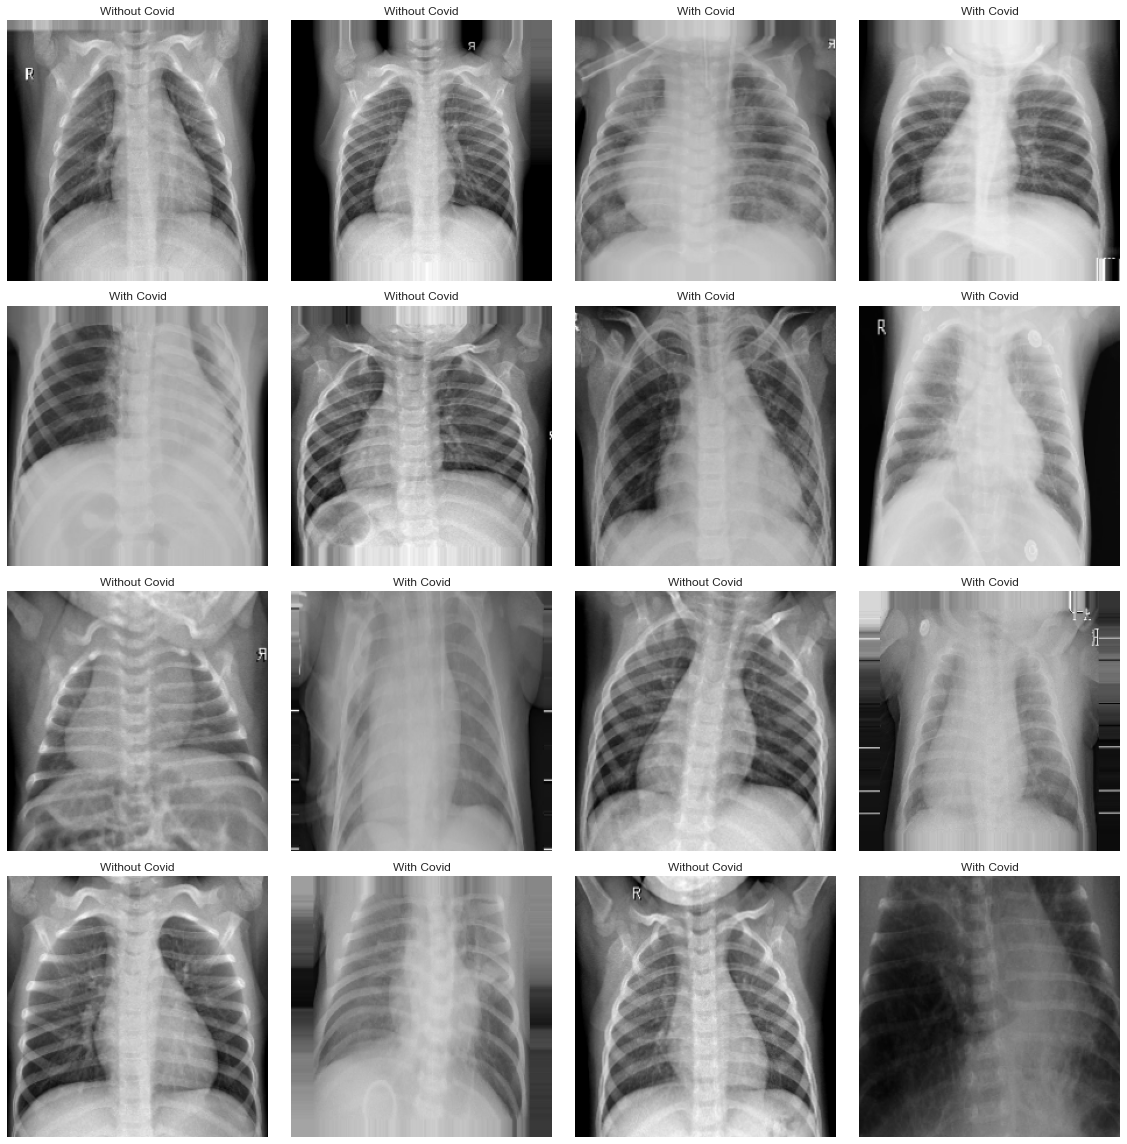

In [8]:
seeExamples(trainSet,labelDict=labelDict)

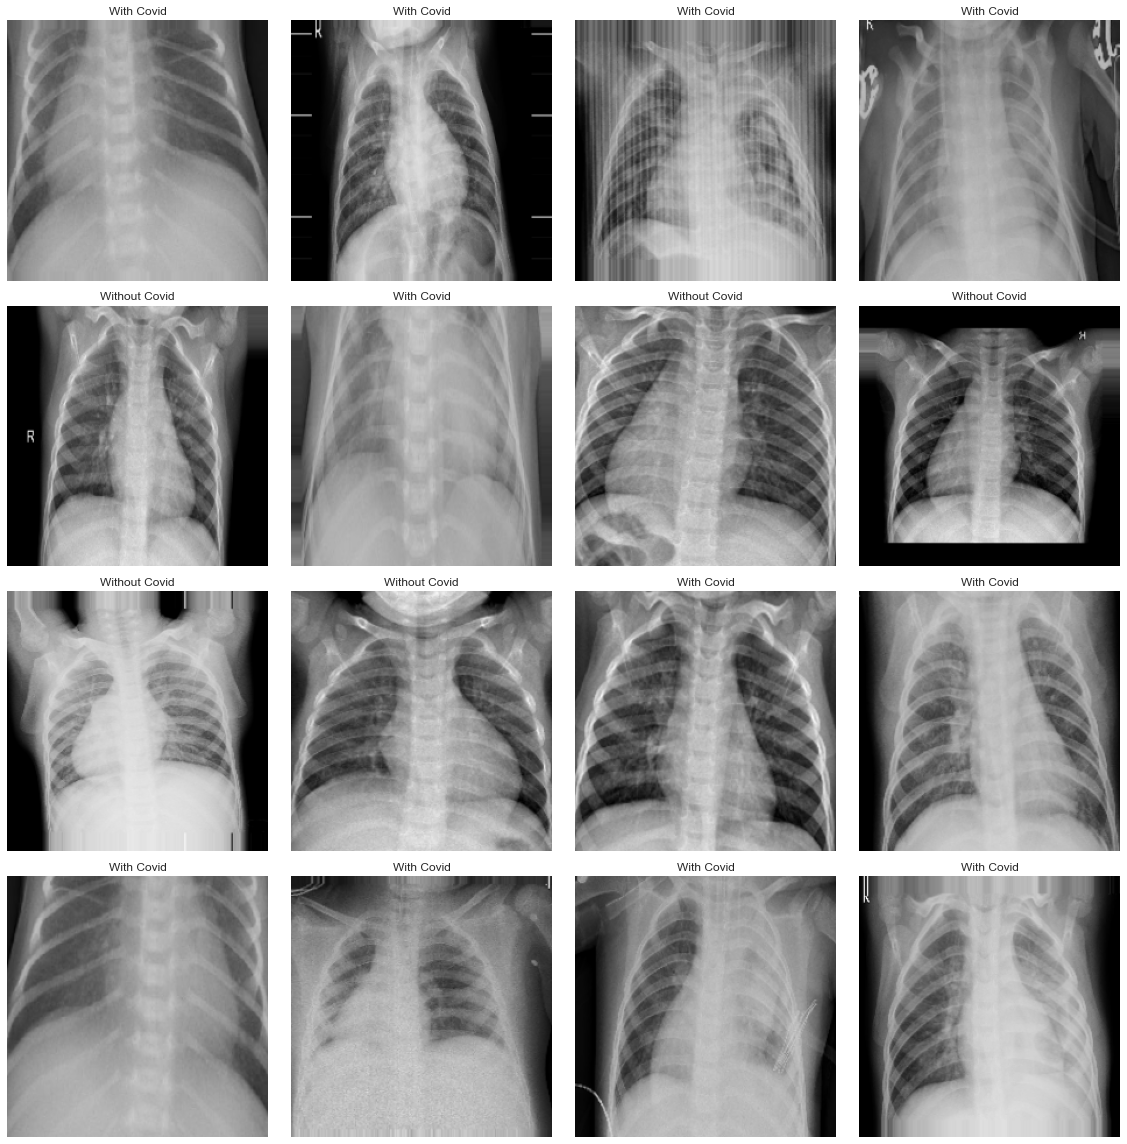

In [9]:
seeExamples(validationSet,labelDict=labelDict)

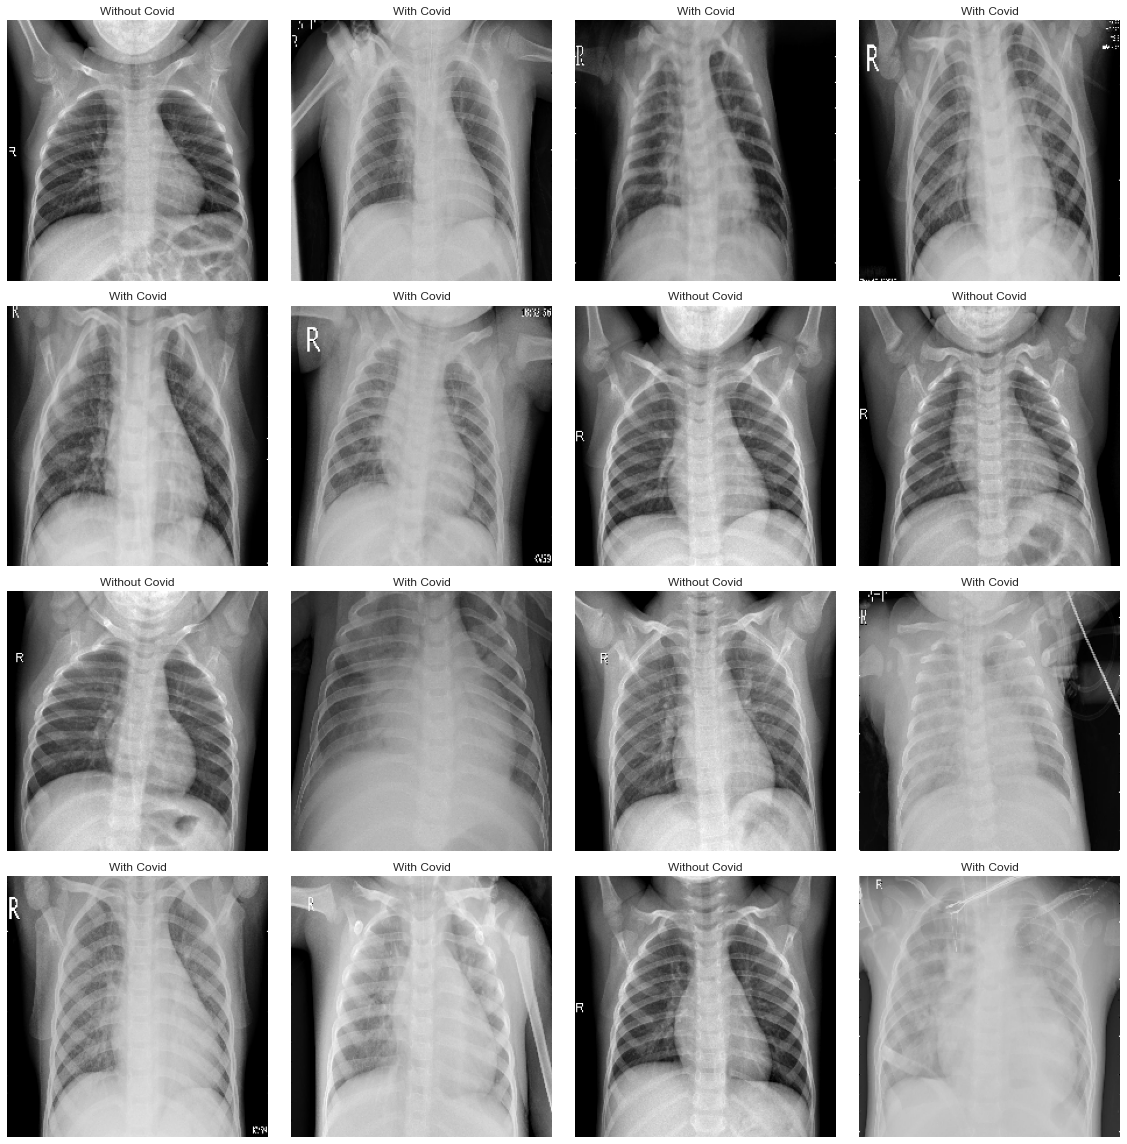

In [10]:
seeExamples(testSet,labelDict=labelDict)

# Model Building

In [11]:
model = Sequential(layers=[
    Conv2D(filters=32, kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3,3),activation='relu'),
    MaxPooling2D(),
    Dropout(rate=0.3),
    Flatten(),
    Dense(units=128,activation='relu'),
    Dense(units=2, activation='softmax')
])

In [12]:
model.compile(
    optimizer=Adam(),
    loss=CategoricalCrossentropy(),
    metrics=['accuracy']
)

In [13]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 54, 54, 64)        0         
                                                                 
 flatten (Flatten)           (None, 186624)            0

In [14]:
callbacks = [ModelCheckpoint(filepath='bestModel.h5',save_best_only=True)]

In [15]:
history = model.fit(
    trainSet,
    epochs=10,
    callbacks=callbacks,
    validation_data=validationSet
)

Epoch 1/10
35/35 [==============================] - 213s 6s/step - loss: 1.7432 - accuracy: 0.6915 - val_loss: 0.2869 - val_accuracy: 0.8952
Epoch 2/10
35/35 [==============================] - 75s 2s/step - loss: 0.2767 - accuracy: 0.8894 - val_loss: 0.2448 - val_accuracy: 0.8992
Epoch 3/10
35/35 [==============================] - 71s 2s/step - loss: 0.2509 - accuracy: 0.8979 - val_loss: 0.2740 - val_accuracy: 0.8871
Epoch 4/10
35/35 [==============================] - 76s 2s/step - loss: 0.2392 - accuracy: 0.9020 - val_loss: 0.1938 - val_accuracy: 0.9315
Epoch 5/10
35/35 [==============================] - 78s 2s/step - loss: 0.2449 - accuracy: 0.9024 - val_loss: 0.2890 - val_accuracy: 0.8629
Epoch 6/10
35/35 [==============================] - 77s 2s/step - loss: 0.2593 - accuracy: 0.9002 - val_loss: 0.2911 - val_accuracy: 0.8669
Epoch 7/10
35/35 [==============================] - 77s 2s/step - loss: 0.2162 - accuracy: 0.9132 - val_loss: 0.2346 - val_accuracy: 0.9113
Epoch 8/10
35/35 [=

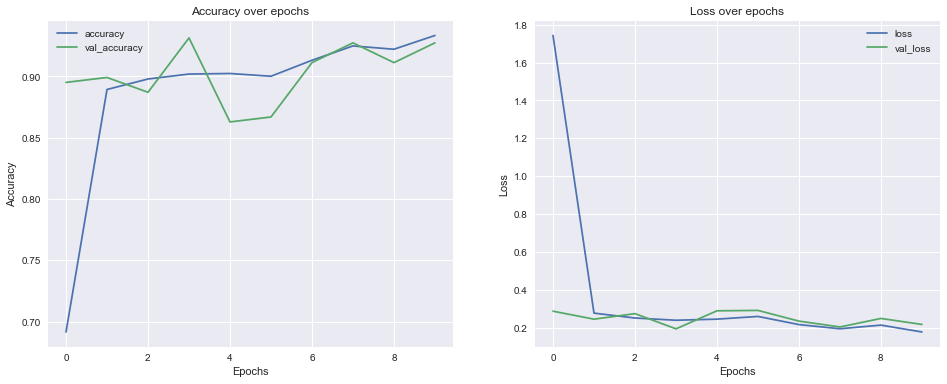

In [16]:
plotHistory(history=history)

In [17]:
bestModel = load_model('bestModel.h5')

# Testing the model

In [18]:
evaluateModel(
    model=bestModel,
    trainSet=trainSet,
    validationSet=validationSet,
    testSet=testSet)

10/10 [==============================] - 36s 4s/step - loss: 0.1859 - accuracy: 0.9338
The accuracy on train set is 92.491%
The accuracy on validation set is 91.935%
The accuracy on test set is 93.376%


In [19]:
testPaths = [
    r'D:\6thSem\DL\Project\Dataset\Test\With Covid\person7_bacteria_24.jpeg',
    r'D:\6thSem\DL\Project\Dataset\Test\Without Covid\IM-0119-0001.jpeg'
]

In [20]:
for path in testPaths:
    pred = predictNew(model=bestModel,filepath=path,labelDict=labelDict)
    print(pred)

With Covid
Without Covid
